In [178]:
import numpy as np
from cleanlab.filter import find_label_issues
from sklearn.metrics import accuracy_score
import numpy as np

import torchvision

import matplotlib.pyplot as plt

In [106]:
pred_probs = np.load(open('pred_probs.npy','rb'))

In [119]:
labels= np.load(open('labels.npy','rb'))
data = pickle.load(open("image_val.p",'rb'))

In [110]:

def convert_multilabel_y_to_list(y):
    yl = list()
    for i in range(y.shape[0]):
        yl.append(np.where(y[i,:])[0].tolist())
    return yl    

In [111]:
multi_labels = convert_multilabel_y_to_list(labels)

In [151]:
pred_labels = convert_multilabel_y_to_list(np.array((pred_probs>0.5),np.int32))

In [224]:
issues = find_label_issues(pred_probs=pred_probs,labels=multi_labels,
                           multi_label=True,return_indices_ranked_by='self_confidence')

In [225]:
class_names = ['Eyeglasses',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Necklace',
 'Wearing_Necktie']

In [226]:
def rep_dl(s):
    q = s.split('/')[-1]
    return '/Users/adityathyagarajan/Downloads/archive-2/img_align_celeba/img_align_celeba/'+q

In [227]:
data2 = np.array([rep_dl(i) for i in data])

In [228]:
def get_label_name(ls):
    return [class_names[i] for i in ls]

In [229]:
pred_label_names = [get_label_name(i) for i in pred_labels]
label_names = [get_label_name(i) for i in multi_labels]

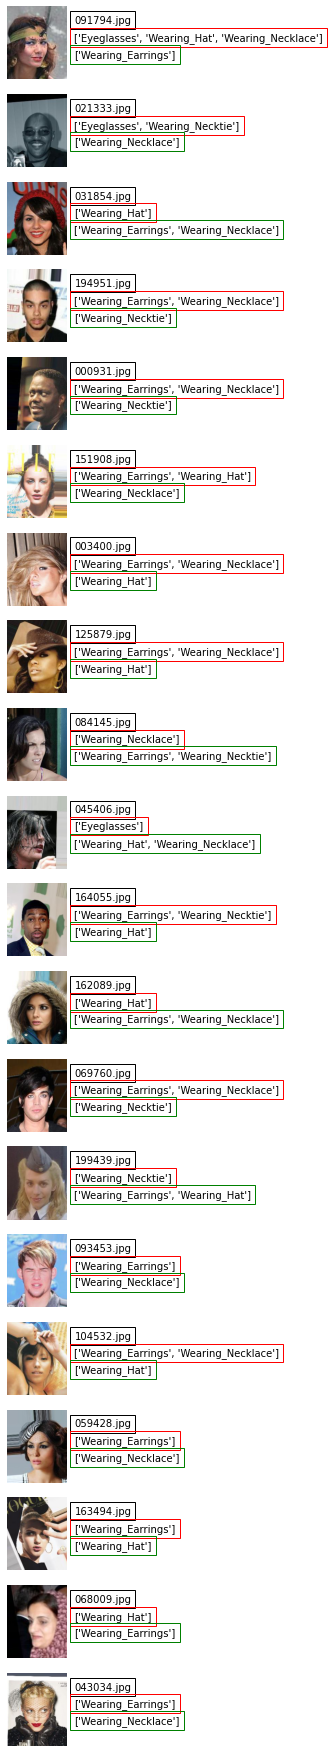

In [230]:
w = 10
h = 10
fig = plt.figure(figsize=(32, 32))
columns = 1
rows = 20
ct=0
for i in range(1, columns*rows +1):
    pos = issues[ct]
    label_error = label_names[pos]
    
    path = data2[pos]
    img = torchvision.io.read_image(path).swapaxes(0,2).swapaxes(0,1)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
    plt.text(200, 50, data2[pos].split('/')[-1], bbox=dict(fill=False, edgecolor='black', linewidth=1))
    plt.text(200, 100, label_error, bbox=dict(fill=False, edgecolor='red', linewidth=1))
    plt.text(200, 150, pred_label_names[pos], bbox=dict(fill=False, edgecolor='green', linewidth=1))
    ct+=1
plt.savefig("errors.pdf")